<a href="https://colab.research.google.com/github/bs18b019/Data-science-work/blob/main/spam_email_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

lets first read the data 

In [11]:
from google.colab import files
uploaded = files.upload()

Saving emails.csv to emails.csv


In [12]:
import io
df = pd.read_csv(io.BytesIO(uploaded['emails.csv']))
print(df.head())

                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1


lets set the printing method of data

In [13]:
# This will create a wider space on which the printed thing should get show
desired_width=500

pd.set_option('display.width', desired_width)

#np.set_printoption(linewidth=desired_width)
#setting the number of columns need to be show 
pd.set_option('display.max_columns',40)

Now lets import all necessary library

In [14]:
import pandas as pd
import sqlite3
# we use RegEx can to check if a string contains the specified search pattern.
import regex as re
import matplotlib.pyplot as plt
#we use wordclod to print the highest frequency of word
from wordcloud import WordCloud

lets see some infomation about data frame

In [15]:
print(df.columns)
print(df.shape)
print(df.spam)

Index(['text', 'spam'], dtype='object')
(5728, 2)
0       1
1       1
2       1
3       1
4       1
       ..
5723    0
5724    0
5725    0
5726    0
5727    0
Name: spam, Length: 5728, dtype: int64


Now let's perform some EDA technique to clean the data, and delling with mising value if possible

In [16]:
print("spam count: " +str(len(df.loc[df.spam==1])))
print("not spam count: " +str(len(df.loc[df.spam==0])))
print(df.shape)
df['spam'] = df['spam'].astype(int)

#Th following line of code will drop all duplicate value
df = df.drop_duplicates()
df = df.reset_index(inplace = False)[['text','spam']]
print(df.shape)

spam count: 1368
not spam count: 4360
(5728, 2)
(5695, 2)


Now let's remove some coomon occuring word like, is, the, you, ......etc.

In [ ]:
clean_desc = []
for w in range(len(df.text)):
    desc = df['text'][w].lower()
    
    #remove punctuation
    desc = re.sub('[^a-zA-Z]', ' ', desc)
    
    #remove tags
    desc=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",desc)
    
    #remove digits and special chars
    desc=re.sub("(\\d|\\W)+"," ",desc)
    
    clean_desc.append(desc)#assign the cleaned descriptions to the data frame
df['text'] = clean_desc
  

In [18]:
print(df.head())

                                                text  spam
0  subject naturally irresistible your corporate ...     1
1  subject the stock trading gunslinger fanny is ...     1
2  subject unbelievable new homes made easy im wa...     1
3  subject color printing special request additio...     1
4  subject do not have money get software cds fro...     1


now we need to remove some special word which occur most frequently

In [19]:
stop_words = ['is','you','your','and', 'the', 'to', 'from', 'or', 'I', 'for', 'do', 'get', 'not', 'here', 'in', 'im', 'have', 'on', 're', 'new', 'subject']

Now lets polt the wordcloud of data

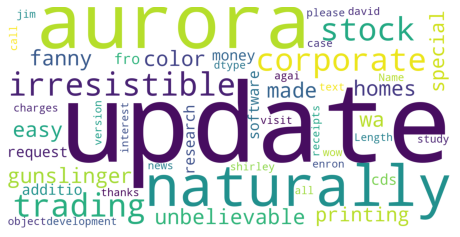

In [22]:
wordcloud = WordCloud(width = 1600, height = 800, background_color = 'white', stopwords = stop_words, max_words = 1000, min_font_size = 20).generate(str(df['text']))#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

If we think about all word then we will get then it will have mostly 'update', 'aurora', 'naturally', .... etc


now lets check about only spam emails


In [23]:
df1=df[df['spam']==1]
print(df1.shape)

(1368, 2)


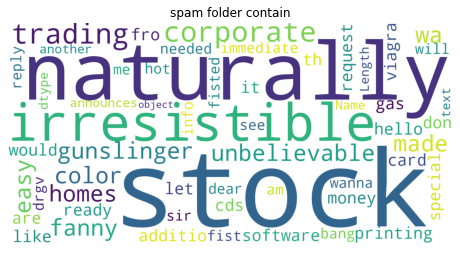

In [24]:
wordcloud = WordCloud(width = 1600, height = 800, background_color = 'white', stopwords = stop_words, max_words = 1000, min_font_size = 20).generate(str(df1['text']))#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('spam folder contain')
plt.show()

We can say that spam email generlly contain 'naturally, irresistible, stock.....etc'


Noe lets also check what not spam emali contain

(1368, 2)


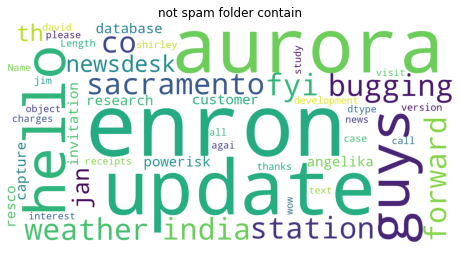

In [25]:
df2=df[df['spam']==0]
print(df1.shape)
wordcloud = WordCloud(width = 1600, height = 800, background_color = 'white', stopwords = stop_words, max_words = 1000, min_font_size = 20).generate(str(df2['text']))#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('not spam folder contain')
plt.show()

Noe lets predict which email is spam and which is not, for that I use scikitlearn library, so let's first import necessary library

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import ensemble 
from sklearn.metrics import classification_report, accuracy_score

now lets see how count vectorizer work for smaller text the will apply for larger text

In [29]:
text = ["the dog is white", "the cat is black", "the cat and the dog are friends"]#instantiate the class
cv = CountVectorizer()#tokenize and build vocab
cv.fit(text)
print(cv.fit(text))
print(cv.vocabulary_)#transform the text
vector = cv.transform(text)
print(vector.toarray())

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)
{'the': 7, 'dog': 4, 'is': 6, 'white': 8, 'cat': 3, 'black': 2, 'and': 0, 'are': 1, 'friends': 5}
[[0 0 0 0 1 0 1 1 1]
 [0 0 1 1 0 0 1 1 0]
 [1 1 0 1 1 1 0 2 0]]


Noe lets aaply this concept to our data frame

In [30]:
text_vec = CountVectorizer().fit_transform(df['text'])
X_train, X_test, y_train, y_test = train_test_split(text_vec, df['spam'], test_size = 0.15, random_state = 42, shuffle = True)

Firstly I am going to use gredientBostingclassifier the will check accuary viya other algorithms also

In [31]:
classifier = ensemble.GradientBoostingClassifier(n_estimators = 100,learning_rate = 0.5,   max_depth = 6)

now its time to make model and preicted the output of splited data

In [32]:
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       635
           1       0.96      0.93      0.94       220

    accuracy                           0.97       855
   macro avg       0.97      0.96      0.96       855
weighted avg       0.97      0.97      0.97       855



As we can in classification report that we are getting 97% accuracy which is pretty good 

**Now, Going for sentiment analysis of same data**

lest install textblob for sentiment analysis

In [39]:
!pip install -U textblob
!python -m textblob.download_corpora

Requirement already up-to-date: textblob in /usr/local/lib/python3.7/dist-packages (0.15.3)
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


now aaplying textblob method in our dataframe

In [43]:
from textblob import TextBlob

#load the descriptions into textblob
email_blob = [TextBlob(text) for text in df['text']]
#add the sentiment metrics to the dataframe
df['tb_Pol'] = [b.sentiment.polarity for b in email_blob]
df['tb_Subj'] = [b.sentiment.subjectivity for b in email_blob]
#show dataframe
df.head()

,text,spam,tb_Pol,tb_Subj
0,subject naturally irresistible your corporate ...,1,0.296607,0.546905
1,subject the stock trading gunslinger fanny is ...,1,0.160317,0.562698
2,subject unbelievable new homes made easy im wa...,1,0.040229,0.480581
3,subject color printing special request additio...,1,0.163492,0.468254
4,subject do not have money get software cds fro...,1,0.433333,0.395833
